In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
ds=pd.read_csv('census_income.csv')

In [3]:
ds

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
ds.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
ds.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
ds.shape

(32560, 15)

In [7]:
ds.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
#so firsty we saw that there is not a null values in datasets,nut there are many object columns so we need to change in int

In [10]:
ds['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [11]:
ds['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [12]:
ds['Fnlwgt'].unique()

array([ 83311, 215646, 234721, ...,  34066,  84661, 257302], dtype=int64)

In [13]:
ds.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

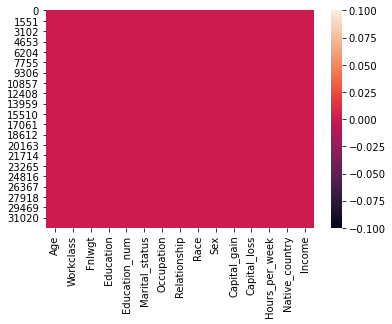

In [14]:
sns.heatmap(ds.isnull())

In [15]:
ds.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [16]:
#so there are many columns that are not senn there because they are in object type
#so first we covert that in integer values
#so first we some univariate analysis

<AxesSubplot:>

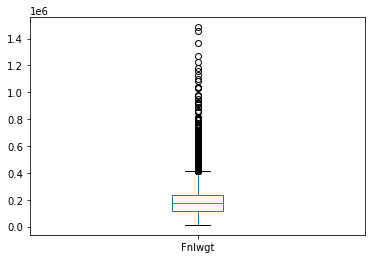

In [17]:
ds['Fnlwgt'].plot.box()

<AxesSubplot:>

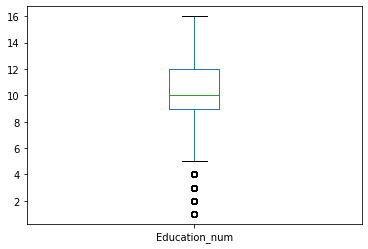

In [18]:
ds['Education_num'].plot.box()

<AxesSubplot:>

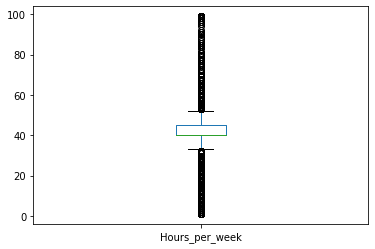

In [19]:
ds['Hours_per_week'].plot.box()

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ds['Workclass']=le.fit_transform(ds['Workclass'])

In [21]:
ds

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,4,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,4,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,4,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,4,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,4,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,4,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,4,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [22]:
ds['Education']=le.fit_transform(ds['Education'])

In [23]:
ds['Marital_status']=le.fit_transform(ds['Marital_status'])

In [24]:
ds['Occupation']=le.fit_transform(ds['Occupation'])

In [25]:
ds['Relationship']=le.fit_transform(ds['Relationship'])

In [26]:
ds['Race']=le.fit_transform(ds['Race'])

In [27]:
ds['Sex']=le.fit_transform(ds['Sex'])

In [28]:
ds['Native_country']=le.fit_transform(ds['Native_country'])

In [29]:
ds.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,<=50K
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,<=50K
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,<=50K
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,<=50K
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,<=50K


In [30]:
ds.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125


<AxesSubplot:>

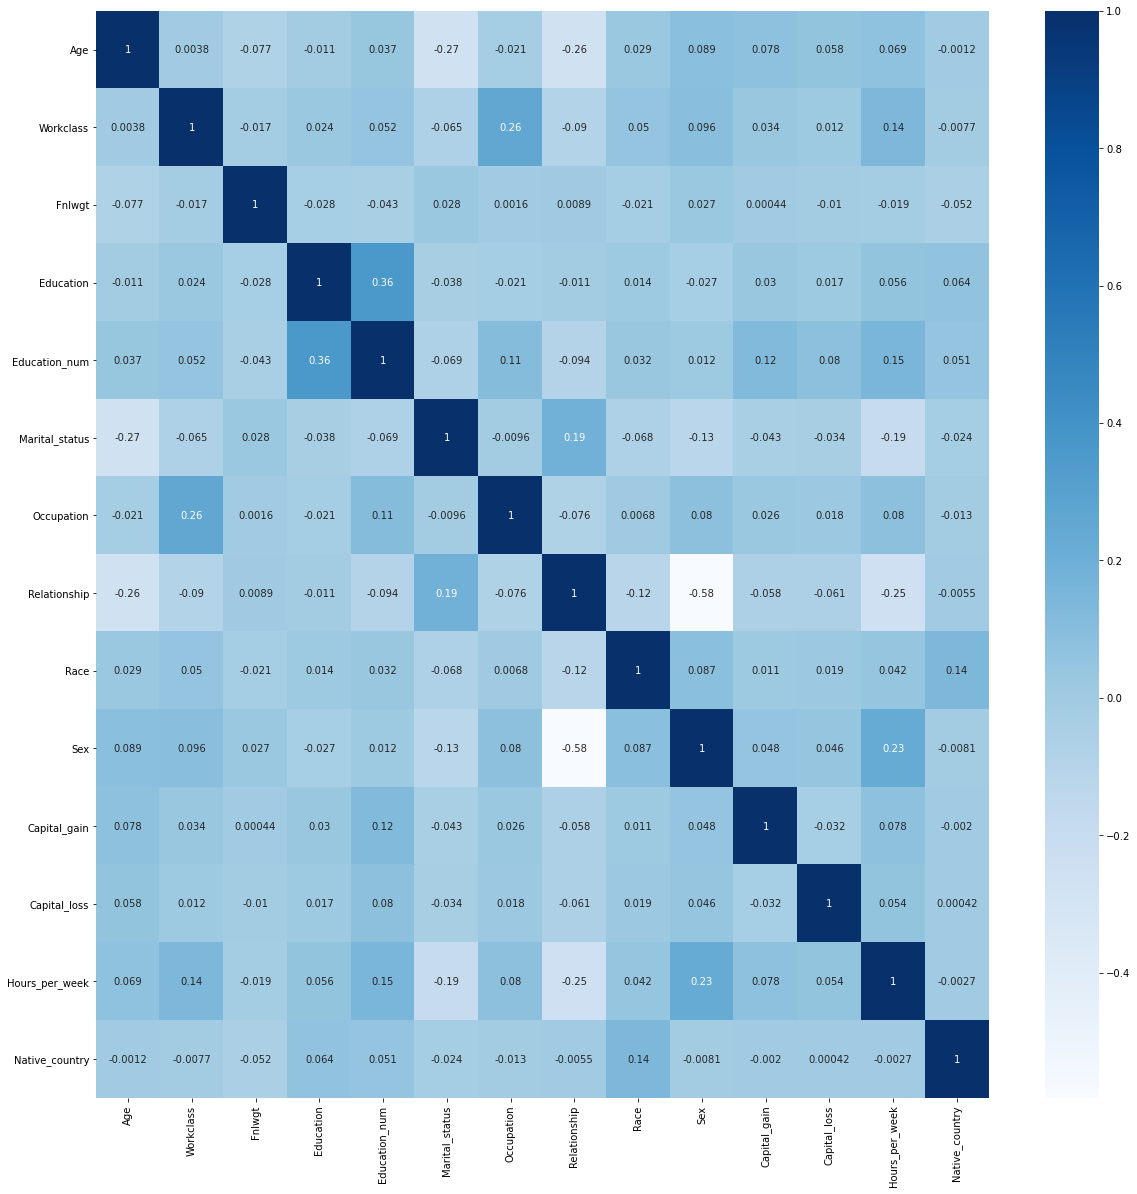

In [31]:
fig=plt.figure(figsize=(20,20))
hc=ds.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues")

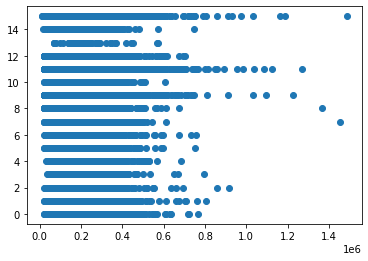

In [32]:
plt.scatter(ds['Fnlwgt'],ds['Education'])
plt.show()

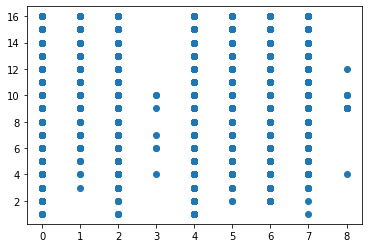

In [35]:
plt.scatter(ds['Workclass'],ds['Education_num'])
plt.show()

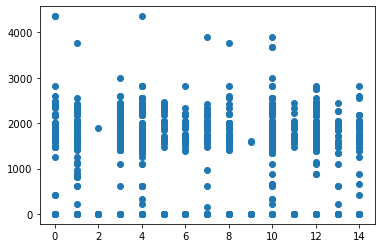

In [36]:
plt.scatter(ds['Occupation'],ds['Capital_loss'])
plt.show()

In [38]:
ds.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
dtype: float64

In [49]:
ds

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,13,39,<=50K
1,38,4,215646,11,9,0,6,1,4,1,0,40,39,<=50K
2,53,4,234721,1,7,2,6,0,2,1,0,40,39,<=50K
3,28,4,338409,9,13,2,10,5,2,0,0,40,5,<=50K
4,37,4,284582,12,14,2,4,5,4,0,0,40,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,38,39,<=50K
32556,40,4,154374,11,9,2,7,0,4,1,0,40,39,>50K
32557,58,4,151910,11,9,6,1,4,4,0,0,40,39,<=50K
32558,22,4,201490,11,9,4,1,3,4,1,0,20,39,<=50K


In [51]:
ds.drop('Income',axis=1,inplace=True)

In [52]:
from scipy.stats import zscore

In [55]:
Zcsr=np.abs(zscore(ds))
threshold=3
print(np.where(Zscr>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([12, 11,  8, ...,  8,  8,  8], dtype=int64))


In [69]:
x=ds.drop(columns=["Fnlwgt"])
y=ds[["Fnlwgt"]]

In [70]:
x.shape

(32560, 12)

In [71]:
y.shape

(32560, 1)

In [57]:
for i in x.columns:
    if x[i].skew()>0.5:
        x[i]=np.cbrt(x[i])
        if x[i].skew()<-0.5:
            x[i]=np.cbrt(x[i])
            
x.skew()

Age               0.090565
Workclass        -0.752280
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.114540
Relationship     -0.102451
Race             -2.435332
Sex              -0.719244
Capital_loss      4.336999
Hours_per_week    0.227636
Native_country   -3.658235
dtype: float64

In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=347)

In [125]:
x_train.shape

(25396, 12)

In [126]:
y_train.shape

(25396, 1)

In [127]:
x_test.shape

(7164, 12)

In [128]:
y_test.shape

(7164, 1)

In [129]:
lm=LinearRegression()

In [130]:
lm.fit(x_train,y_train)

LinearRegression()

In [131]:
lm.coef_

array([[-5.71457132e+02, -8.86764425e+02, -4.05249074e+02,
        -1.36786907e+03,  4.10668204e+02, -1.19379627e+01,
         4.19360687e+02, -1.46708751e+03,  1.02623728e+04,
        -7.49733617e-01, -1.13832642e+02, -6.38158189e+02]])

In [132]:
lm.intercept_

array([258274.34780189])

In [134]:
lm.score(x_train,y_train)

0.012304606655631822

In [135]:
pred=lm.predict(x_test)
print("predicted result price:",pred)
print("actual price",y_test)

predicted result price: [[186537.9737216 ]
 [169502.38639723]
 [178280.49023085]
 ...
 [214995.01024487]
 [185244.46507759]
 [184283.65861805]]
actual price        Fnlwgt
10354  227244
12686  274916
9544   209464
18463  271160
31851   93885
...       ...
28308  121023
27951  200153
14895  327127
28145   30759
17439  264627

[7164 rows x 1 columns]


In [136]:
from sklearn.metrics import mean_absolute_error

In [137]:
print('error:')
print('mean absolute error:',mean_absolute_error(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))

error:
mean absolute error: 77247.12609530317
mean squared error: 10917562964.973007


In [140]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.010736957554070559


# regularization and irregularization

In [141]:
from sklearn.linear_model import Lasso,Ridge

In [142]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.012304606655631711

In [143]:
rd=Ridge(alpha=0.0010)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.0123046066556316

In [144]:
import joblib
joblib.dump(rd,"rdcensusmodel.obj")

['rdcensusmodel.obj']